In [33]:
# from __future__ import print_function
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import time
import sys
import copy
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append('/Users/floorbroekgaarden/Projects/BHNS_project/Scripts')
import string

import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
import coencodeVarious        as CV
from PostProcessingScripts import * 
from ClassFormationChannels_5mainchannels import * 


import pandas as pd


from astropy import units as u
from astropy import constants as const


In [34]:

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [10]:
print(MSSFRnameslist)




MSSFRnameslistWantedOrder = []
MSSFRnameslistWantedOrder.append('000') # add phenomenological 

for ind_GSMF, GSMF in enumerate([0,1,2]):
    ind_x = ind_GSMF + 1
    for ind_MZ, MZ in enumerate([0,1,2]):
        ind_y = ind_MZ +1
        for ind_SFR, SFR in enumerate([0,1,2]):
            ind_z = ind_SFR+1
            
            
            
            
        

            MSSFRnameslistWantedOrder.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
            
print(MSSFRnameslistWantedOrder)


indexlist = np.asarray(range(28))
print(indexlist)
indexOrderedToOldMSSFR = []
for mssfr in MSSFRnameslistWantedOrder:
    mask = (np.asarray(MSSFRnameslist)==mssfr)
    ind_map = indexlist[mask]
    indexOrderedToOldMSSFR.append(int(ind_map[...].squeeze()))
    
    
print(indexOrderedToOldMSSFR)



dictOldmssfrINDtoNEWmssfrIND = {MSSFRnameslist[i]: indexOrderedToOldMSSFR[i] for i in range(len(MSSFRnameslist))}



print(dictOldmssfrINDtoNEWmssfrIND['321'])

['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
['000', '111', '112', '113', '121', '122', '123', '131', '132', '133', '211', '212', '213', '221', '222', '223', '231', '232', '233', '311', '312', '313', '321', '322', '323', '331', '332', '333']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
[0, 1, 4, 7, 10, 13, 16, 19, 22, 25, 2, 5, 8, 11, 14, 17, 20, 23, 26, 3, 6, 9, 12, 15, 18, 21, 24, 27]
8


In [4]:
def tfZ(Z):
    Zsolar=0.0142
    logZ = np.log10(Z) # /Zsolar
    return logZ
import seaborn as sns

In [11]:
nModels=15
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
modelDirList = ['fiducial', 'massTransferEfficiencyFixed_0_25', 'massTransferEfficiencyFixed_0_5', 'massTransferEfficiencyFixed_0_75', \
               'unstableCaseBB', 'alpha0_5', 'alpha2_0', 'fiducial', 'rapid', 'maxNSmass2_0', 'maxNSmass3_0', 'noPISN',  'ccSNkick_100km_s', 'ccSNkick_30km_s', 'noBHkick' ]

alphabetDirDict =  {BPSnameslist[i]: modelDirList[i] for i in range(len(BPSnameslist))}


physicalNamesBPSmodels = [r'\textbf{fiducial}',\
                           r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable case BB}',\
                           r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'\textbf{optimistic CE}',\
                          r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}=2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}=3.0\,\rm{M}_{\odot}$',\
                          r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}=100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}=30\,\rm{km}\,\rm{s}^{-1}$',\
                          r'\textbf{SN} '+ r'$v_{\rm{k,BH}}=0\,\rm{km}\,\rm{s}^{-1}$' ]



alphabetPhysicalNameDict =  {BPSnameslist[i]: physicalNamesBPSmodels[i] for i in range(len(BPSnameslist))}



physicalNamesBPSmodelsWithEnter = [r'\textbf{fiducial}',\
                           r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable}' + '\n'+ r'\textbf{case BB}',\
                           r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'\textbf{optimistic CE}',\
                          r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$3.0\,\rm{M}_{\odot}$',\
                          r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$30\,\rm{km}\,\rm{s}^{-1}$',\
                          r'\textbf{SN} '+ r'$v_{\rm{k,BH}}$' +'\n' + r'$0\,\rm{km}\,\rm{s}^{-1}$' ]

alphabetPhysicalNameDictWithEnter =  {BPSnameslist[i]: physicalNamesBPSmodelsWithEnter[i] for i in range(len(BPSnameslist))}


print(alphabetPhysicalNameDict['E'])

\textbf{unstable case BB}


In [37]:
BBHsGWTC1 = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729',  'GW170809', 'GW170814', 'GW170818', 'GW170823']
BNSsGWTC1 =['GW170817']
BBHsGWTC2 = ['GW190408_181802']
BNSsGWTC2 =[]

def obtainGWTC1_MassAndWeight(DCOtype):
    
    
    M1all, M2all = [], []
    Weightsall = []
    
    if DCOtype=='BHBH':
        print('doing GWTC-1 BBH')
        for ind_bbh, BBH in enumerate(BBHsGWTC1):
            BBH_file = '/Users/floorbroekgaarden/Projects/GWTC-1_LVK_catalog/GWTC-1_sample_release/'+BBH+'_GWTC-1.hdf5'
            BBH = h5.File(BBH_file, 'r')
            M1 = BBH['Overall_posterior']['m1_detector_frame_Msun']
            M2 = BBH['Overall_posterior']['m2_detector_frame_Msun']
            print(len(M1))
            print(len(M2))
            M1all = np.concatenate((M1, M1all))
            M2all = np.concatenate((M2, M2all))


            w = np.ones_like(M1) * (1./len(M1))
            Weightsall = np.concatenate((w, Weightsall))
        print('doing GWTC-2 BBH')
        for ind_bbh, BBH in enumerate(BBHsGWTC2):
            BBH_file = '/Users/floorbroekgaarden/Projects/GWTC-1_LVK_catalog/GWTC-2_sample_release/'+BBH+'.h5'
            BBH = h5.File(BBH_file, 'r')
            
            data = read(BBH_file)
            samples_dict = data.samples_dict
            posterior_samples = samples_dict['PrecessingSpinIMRHM']
            parameters = sorted(list(posterior_samples.keys()))
            print(parameters)
#             samples_dict = BBH.samples_dict
#             posterior_samples = samples_dict['PrecessingSpinIMRHM']            
            print(BBH['PublicationSamples']['posterior_samples'].keys())
            M1 = BBH['Overall_posterior']['m1_detector_frame_Msun']
            M2 = BBH['Overall_posterior']['m2_detector_frame_Msun']
            print(len(M1))
            print(len(M2))
            M1all = np.concatenate((M1, M1all))
            M2all = np.concatenate((M2, M2all))


            w = np.ones_like(M1) * (1./len(M1))
            Weightsall = np.concatenate((w, Weightsall))
            
    elif DCOtype=='NSNS':
        print('doing GWTC-1 BNS')
        for ind_bbh, BNS in enumerate(BNSsGWTC1):
            BNS_file = '/Users/floorbroekgaarden/Projects/GWTC-1_LVK_catalog/GWTC-1_sample_release/'+BNS+'_GWTC-1.hdf5'
            BNS = h5py.File(BNS_file, 'r')
            M1 = BNS['IMRPhenomPv2NRT_lowSpin_posterior']['m1_detector_frame_Msun']
            M2 = BNS['IMRPhenomPv2NRT_lowSpin_posterior']['m2_detector_frame_Msun']
            print(len(M1))
            print(len(M2))
            M1all = np.concatenate((M1, M1all))
            M2all = np.concatenate((M2, M2all))


            w = np.ones_like(M1) * (1./len(M1))
            Weightsall = np.concatenate((w, Weightsall))
            
        print('doing GWTC-2 BNS')
        for ind_bbh, BNS in enumerate(BNSsGWTC2):
            BNS_file = '/Users/floorbroekgaarden/Projects/GWTC-1_LVK_catalog/GWTC-2_sample_release/'+BNS+'_GWTC-1.hdf5'
            BNS = h5py.File(BNS_file, 'r')
            M1 = BNS['IMRPhenomPv2NRT_lowSpin_posterior']['m1_detector_frame_Msun']
            M2 = BNS['IMRPhenomPv2NRT_lowSpin_posterior']['m2_detector_frame_Msun']
            print(len(M1))
            print(len(M2))
            M1all = np.concatenate((M1, M1all))
            M2all = np.concatenate((M2, M2all))


            w = np.ones_like(M1) * (1./len(M1))
            Weightsall = np.concatenate((w, Weightsall))
        
    return M1all, M2all, Weightsall




In [38]:
M1all, M2all, Weightsall  = obtainGWTC1_MassAndWeight(DCOtype='BHBH')

doing GWTC-1 BBH
8350
8350
16096
16096
52252
52252
24972
24972
6448
6448
5112
5112
14802
14802
40000
40000
5862
5862
4278
4278
doing GWTC-2 BBH


NameError: global name 'read' is not defined

In [39]:
%matplotlib inline
import pesummary
from pesummary.io import read
print(pesummary.__version__)
import h5py
%config InlineBackend.figure_format = 'retina'

ImportError: No module named pesummary

In [7]:
def plotConfidenceIntervals(DCOtype='BHNS', BPSnameslist=['A'], xvarind=0, axe=None,  ylim=None, xlabel='xlabel', ylabel='ylabel'):
    """  
    options:
    
    
    xvarind, index of the variable in the list ['Mass1', 'Mass2', 'tc',\
                   'log10(tc)', 'TotMass', 'ChirpMass', 'q', Z, log(Z)]
    
    """
    
    
#     BPScolors       = sns.hls_palette(len(BPSnameslist), l=.46) #  sns.color_palette("huls", (len(BPSnameslist)))
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    #     BPScolors =  = [cm(x) for x in np.linspace(0,1 , (len(BPSnameslist)))] 
    
#     BPScolors = ['crimson', 'purple', 'mediumblue', 'deepskyblue', 'teal', 'yellowgreen', 'gold', 'darkorange', 'orangered', 'red']
    markerstyles = ['+', 'x', 'o', 'x', '+']
    quantileStrings = ['0.005', '0.05', '0.16', '0.25', '0.5', '0.75', '0.84', '0.95', '0.995']
 
    minq0_005= 100
    minq0_05 = 100
    minq0_25 =100
    maxq0_75 = -10
    maxq0_95 = -10
    maxq0_995= -10 
    

    
    
    xright =0.05
    for ind_m, BPSmodelName in enumerate(BPSnameslist):
        dfname = '/Users/floorbroekgaarden/Projects/BHNS_project/PlottingScripts/9_PredictedDistributions_BPS_and_MSSFR_variations/csvFilesConfidenceIntervals/ConfidenceIntervals_model_' + BPSmodelName + '_' + DCOtype + '.csv'
#         print('now at BPS model name =', BPSmodelName)
        df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

            
        ind_max = len(MSSFRnameslist) + xvarind*len(MSSFRnameslist)
        ind_min = xvarind*len(MSSFRnameslist)
        
        dx = 0.4 #0.3
        dxrange = np.linspace(-dx, +dx, len(MSSFRnameslist)+1) + ind_m
        dxlen = (2*dx)/len(MSSFRnameslist)
        for ind_mssfr, MSSFRname in enumerate(MSSFRnameslist):
        
            q0_005= (df.iloc[0][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr] #
            q0_05 = (df.iloc[1][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_25 = (df.iloc[3][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_5 = (df.iloc[4][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_75 = (df.iloc[5][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_95 = (df.iloc[7][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_995=(df.iloc[8][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]

            
            if xvarind ==7:
                # we want actually the log(Z) values:
                Zsolar = 0.0142 # solor metallicity
                q0_005, q0_05, q0_25, q0_5, q0_75, q0_95, q0_995 =\
                tfZ(q0_005), tfZ(q0_05), tfZ(q0_25), tfZ(q0_5), tfZ(q0_75), tfZ(q0_95), tfZ(q0_995)
                
#                 minq0_005, minq0_05, minq0_25, maxq0_75, maxq0_95, maxq0_995 = \
#                 tfZ(minq0_005), tfZ(minq0_05), tfZ(minq0_25), tfZ(maxq0_75), tfZ(maxq0_95), tfZ(maxq0_995)            
            
        
            minq0_005 = np.min([minq0_005, q0_005])
            minq0_05 = np.min([minq0_05, q0_05])
            minq0_25 = np.min([minq0_25, q0_25])
            
            maxq0_75 = np.max([maxq0_75, q0_75])
            maxq0_95 = np.max([maxq0_95, q0_95])
            maxq0_995 = np.max([maxq0_995, q0_995])
            
            

            
            for ind_q, interval in enumerate(['99percent', '90percent', '50percent', 'median']):
                
                xx = dxrange[ind_mssfr]
                
                if interval=='median':
                    if (ind_m==0) & (ind_mssfr==0):
                        axe.scatter(xx, q0_5, \
                                c=BPScolors[ind_m], s=80, label=None, \
                                marker='*', zorder=300, edgecolor='black')                        
                        
                    axe.scatter(xx, q0_5, \
                                c=BPScolors[ind_m], s=20, label=None, \
                                marker='.', zorder=200)        
                else:
                
                    if interval =='99percent':
                        zorder = 102
                        yy = [q0_005, q0_995]
                        alpha = 0.15
                    elif interval=='90percent':
                        zorder = 105
                        yy = [q0_05, q0_95]
                        alpha = 0.25    
                    elif interval=='50percent':
                        zorder = 110
                        yy = [q0_25, q0_75]
                        alpha = 0.4                         
                        
                    axe.bar(xx, height=(yy[1]-yy[0]), bottom=yy[0], color='white', alpha=1, \
                           width=dxlen, zorder=zorder-1)
                    axe.bar(xx, height=(yy[1]-yy[0]), bottom=yy[0], color=BPScolors[ind_m], alpha=alpha, \
                           width=dxlen, zorder=zorder)
############        
        
        # draw names just above one of the bar plots 
#         if (ind_m==0) & (xvarind==0):
#             # if we are at fiducial model
#             fontsize=6
#             for ind_mssfr, mssfrName in enumerate(MSSFRnameslist):
#                 xx = dxrange[ind_mssfr]
#                 dy = (ylim[1]-ylim[0])* (1/12.)
#                 yy = maxq0_995 + (ind_mssfr%3)*dy 
#                 axe.text(xx, yy, s=mssfrName, fontsize=fontsize, color='k',\
#                                      ha='center', va='bottom', weight='bold', alpha=1, rotation=90 )
                
#                 axe.plot([xx,xx], [yy], dx=0, dy=, color=BPScolors[ind_m],\
#                            alpha=0.4)        
         
    
            # DRAW ARROWS 
#         if (ind_m ==(len(BPSnameslist)-1)) & (xvarind==0):
#             # we will plot some text for last value:
#             fontsize = fs-10
#             xxb= xx+dxlen*3
#             dxx = dxlen*8
#             textt = 'median' 
#             axe.text(xxb, q0_5, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
#                      ha='left', va='center', weight='bold' , zorder=10)
            
            
#             textt = ' 50'  +'\% '+ r'$ \, $  '  
#             yloc = (q0_75-q0_25)*0.75 + q0_25
#             axe.arrow(xxb+dxx+(2*dxlen), yloc, dx=-dxx, dy=0, color=BPScolors[ind_m],\
#                       head_width=0.2,head_length=0.05, alpha=0.8, zorder=10)
#             axe.text(xxb+dxx+4*dxlen, yloc, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
#                      ha='left', va='center', weight='bold', alpha=1, zorder=10 )            
            
            
#             textt = ' 90'  +'\% '+ r'$ \, $  '  
#             yloc = (q0_95-q0_05)*0.75 + q0_05
#             axe.arrow(xxb+dxx+(2*dxlen), yloc, dx=-dxx, dy=0, color=BPScolors[ind_m],\
#                       head_width=0.2,head_length=0.05, alpha=0.5, zorder=10)
#             axe.text(xxb+dxx+4*dxlen, yloc, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
#                      ha='left', va='center', weight='bold', alpha=1, zorder=10 )
            
#             textt = ' 99'  +'\% '+ r'$ \, $  '  
#             yloc = (q0_995-q0_005)*0.88 + q0_005
            
#             axe.arrow(xxb+dxx+(2*dxlen), yloc, dx=-dxx, dy=0, color=BPScolors[ind_m],\
#                       head_width=0.2,head_length=0.05, alpha=0.3, zorder=10)
#             axe.text(xxb+dxx+4*dxlen, yloc, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
#                      ha='left', va='center', weight='bold', alpha=1, zorder=10 )
            
            
            
    xx = [-0.5, len(BPSnameslist)+xright]
    yymax90, yymin90 = [maxq0_95, maxq0_95],  [minq0_05, minq0_05]
    yymax99, yymin99 = [maxq0_995, maxq0_995],  [minq0_005, minq0_005]
    yymax50, yymin50 = [maxq0_75, maxq0_75],  [minq0_25, minq0_25]


    axe.fill_between(xx, y1=yymin99, y2=yymax99,   color='white', zorder=0 , alpha =1 )
    axe.fill_between(xx, y1=yymin99, y2=yymax99,   color='lightgray', zorder=1 , alpha =0.15 )
    
    axe.fill_between(xx, y1=yymin90, y2=yymax90,  color='white', zorder=2 , alpha =1 )
    axe.fill_between(xx, y1=yymin90, y2=yymax90,  color='lightgray', zorder=3 , alpha =0.5 )
    
    axe.fill_between(xx, y1=yymin50, y2=yymax50,  color='white', zorder=4 , alpha =1 )     
    axe.fill_between(xx, y1=yymin50, y2=yymax50,  color='lightgray', zorder=5 , alpha =0.8 )    


    
    axe.set_xlim(-0.5, len(BPSnameslist)+xright)

    axe.set_ylim(ylim[0], ylim[1])
    
    axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=20)
    
#     axe.set_xticks(range(len(BPSnameslist)))
#     axe.set_xticklabels(BPSnameslist)
    
    if (xvarind==7) | (xvarind==8):
        physicalnames = []
        for ind_m, bps_model in enumerate(BPSnameslist):
            physicalnames.append(r'\textbf{%s}'%(bps_model) )
        axe.set_xticks(range(len(BPSnameslist)))
        axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,
    
#     if xvarind==0:

    ##### SECOND AXIS ######
    physicalnames=[]
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
    ax2y = axe.twiny()
    ax2y.set_xlim(-0.5, len(BPSnameslist)+xright)

    
    print('fontsize', fs)
    if xvarind==0:
        ax2y.set_xticks(range(len(BPSnameslist)))
        ax2y.set_xticklabels(physicalnames, fontsize=fs-8, rotation=30) 
    else:
        ax2y.set_xticks([])
        ax2y.set_xticklabels([]) 
#         ax2y.set_xticklabels([' ', ' ', ' ', ' ',  ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], fontsize=fs-8, rotation=30) 
# MSSFR names labels
#         ax2 = axe.twiny()
#         ax2.set_xticks(range(len(MSSFRnameslist)+1))
#         MSSFRlabels = np.concatenate((np.asarray([r'$ \rm{xyz}: $ ']), MSSFRnameslist))
#         ax2.set_xticklabels(MSSFRlabels, rotation=0, fontsize=15)    

#         ax2.set_xlim(np.min(range(len(MSSFRnameslist)+1)), np.max(range(len(MSSFRnameslist)+2)))
#         ax2.tick_params(top=False)
    
    
        ########################
#         # SECOND Y-AXIS 
#         ax2x = axe.twinx()
#         if BPSmodelName =='O':
#             ax2x.set_ylim(ylim[0], ylim[1])
#             ax2x.set_ylabel(ylabel, fontsize=20)
#             ax2x.tick_params(labelsize=20)


#         else:
#             ax2x.set_yticklabels( () )
#             ax2x.set_yticks([])    
    
    
    # not showing the axes ticks for figures if its not the bottom panel :-) 
    if (xvarind!=8) & (xvarind!=7):
        axe.get_xaxis().set_ticks([])
        axe.tick_params(bottom=False)
#         axe.set_xlabel(False)
#         axe.get_xaxis().set_visible(False)

    return 
            
            

            
    
    
    
     

starting distribution quantile plot
this might take some time since I need to loop through all model variations and plot colorranges - apologies
('fontsize', 24)
('fontsize', 24)
('fontsize', 24)
halfway
('fontsize', 24)
('fontsize', 24)
('fontsize', 24)
('fontsize', 24)


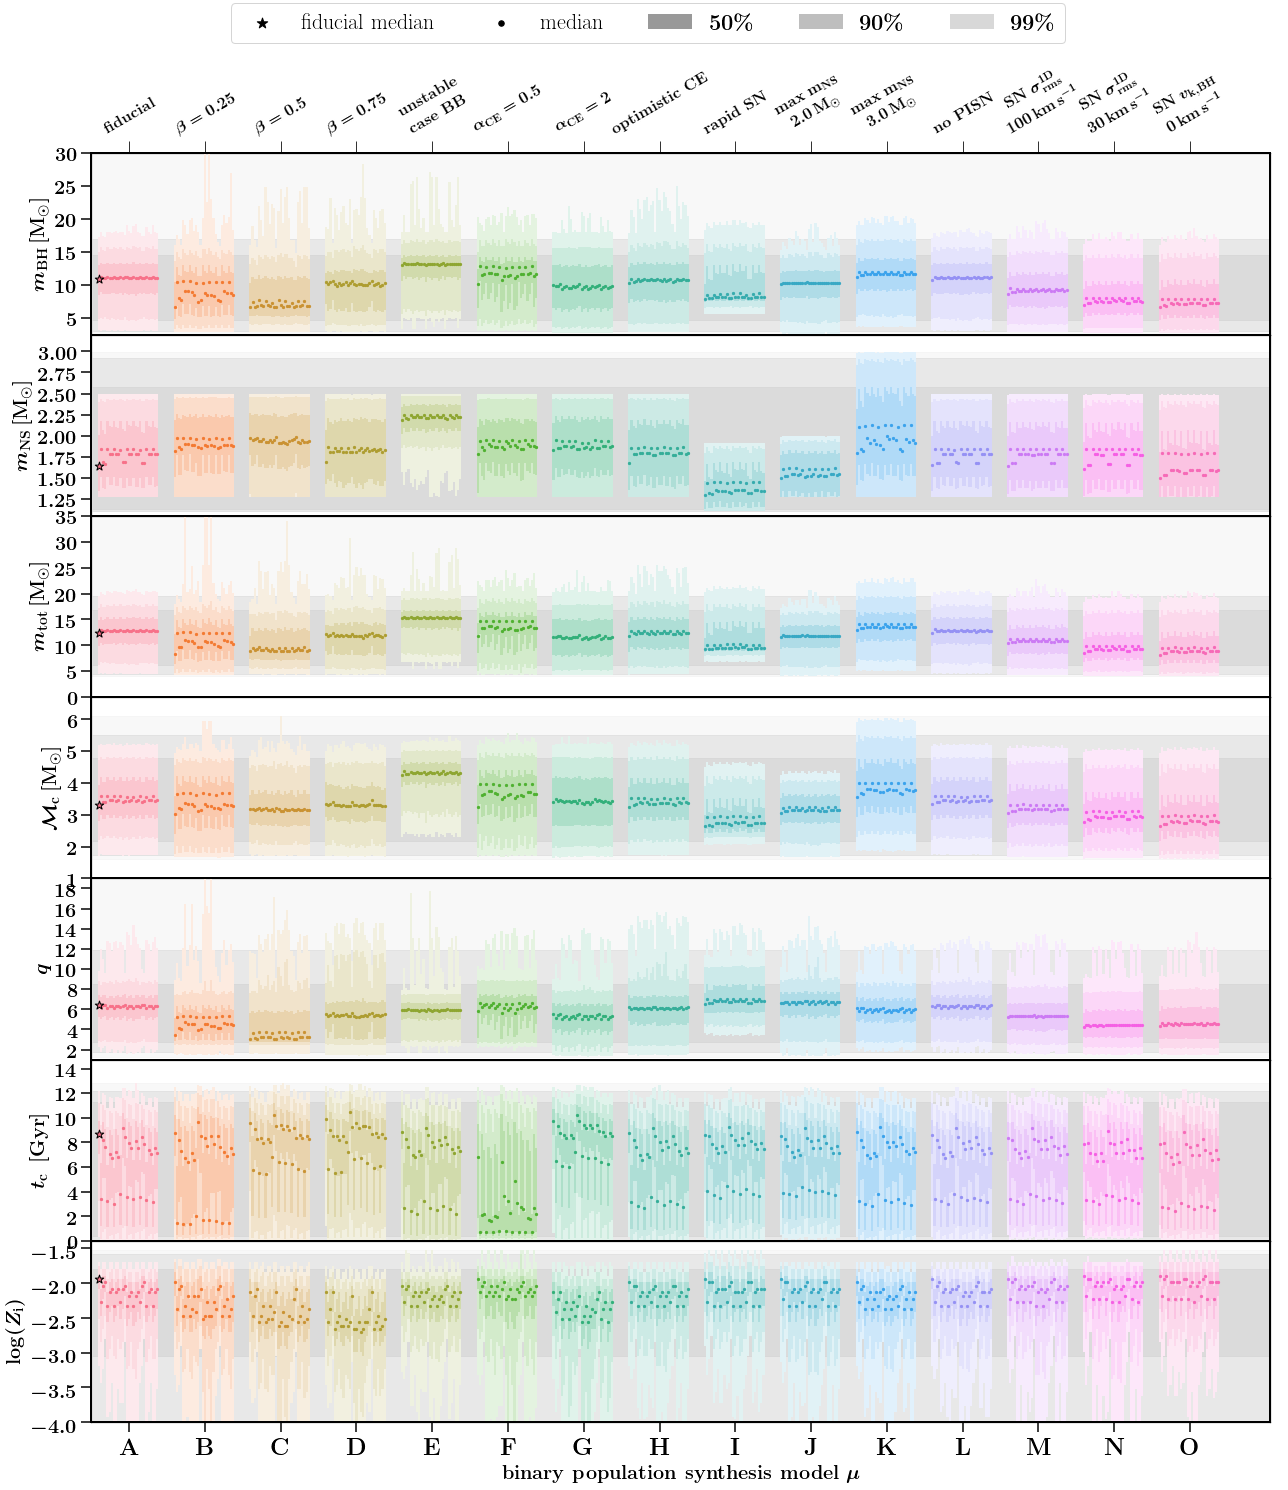

In [24]:
# ['Mass1', 'Mass2', 'tc',\
#                    'log10(tc)', 'TotMass', 'ChirpMass', 'q', Zi]
solar=0.0142
xright = 0.05 # extra space on the right 
NumberBPSmodels=15
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]

DCOtype='BHNS'
ncols, nrows= 1,7
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


print('starting distribution quantile plot')
print('this might take some time since I need to loop through all model variations and plot colorranges - apologies')

xlabel = r'\textbf{binary population synthesis model} $\mu$'

ylabel = r'$m_{\rm{BH}}  \, [\rm{M}_{\odot}]$'
xvarind = 0 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[0],  ylim=[2.5,30], xlabel=xlabel, ylabel=ylabel)

ylabel = r'$m_{\rm{NS}}   \, [\rm{M}_{\odot}]$'
xvarind = 1 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[1],  ylim=[1.05,3.2], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$m_{\rm{tot}}  \, [\rm{M}_{\odot}]$'
xvarind = 4 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[2],  ylim=[0,35], xlabel=xlabel, ylabel=ylabel)
print('halfway')
ylabel = r'$\mathcal{M}_{\rm{c}}  \, [\rm{M}_{\odot}]$'
xvarind = 5 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[3],  ylim=[1,6.7], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$q$'
xvarind = 6 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[4],  ylim=[1,19], xlabel=xlabel, ylabel=ylabel)



ylabel = r' $t_{\rm{c}}$ $ \, [{\rm{Gyr}}]$'
xvarind = 2
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[5],  ylim=[0,14.72], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$\log(Z _{\rm{i}})$'
xvarind = 8 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[6],  ylim=[-4,np.log10(0.04)], xlabel=xlabel, ylabel=ylabel)



for ind_q, interval in enumerate([ 'median', '50percent', '90percent', '99percent']):

    xx_ = [-300, -200]
    yy_ = [-300, -200]

    if interval=='median':
#         if (ind_m==0) & (ind_mssfr==0):
        axe[0].scatter(xx_, yy_, \
                c='k', s=120, label='fiducial median', \
                marker='*', zorder=300, edgecolor='black')                        

        axe[0].scatter(xx_, yy_, \
                    c='k', s=120, label='median', \
                    marker='.', zorder=200)        
    else:


        if interval=='50percent':
            zorder = 110
            yy = yy_
            alpha = 0.4  
            label=r'$50\%$'
        elif interval=='90percent':
            zorder = 105
            yy = yy_
            alpha = 0.25    
            label =r'$90\%$'
        elif interval =='99percent':
            zorder = 102
            yy = yy_
            alpha = 0.15
            label=r'$99\%$'

#         axe.bar(xx_, height=(yy[1]-yy[0]), bottom=yy[0], color='white', alpha=1, \
#                width=dxlen, zorder=zorder-1)
        axe[0].bar(xx_, height=(yy[1]-yy[0]), bottom=yy[0], color='k', alpha=alpha, \
               width=0.5, zorder=zorder, label=label)


handles, labels = axe[0].get_legend_handles_labels()
    
axe[0].set_xlim(-0.5, 15+xright)
lgd = f.legend(handles, labels, fontsize=fs-2, ncol=9,\
                bbox_to_anchor=(.5, 1.04) , loc='upper center') #,  markerscale=2., scatterpoints=1) # loc = 'upper center') #0.56 works 


plt.tight_layout()

f.subplots_adjust(wspace=0, hspace=0.0)

f.savefig('./DistributionQuantileFigures/CDF_BPSandMSSFRvariations_Summary_BHNS_Z.png', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')#, bbox_inches='tight')#, loc='upper center') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
f.savefig('./DistributionQuantileFigures/CDF_BPSandMSSFRvariations_Summary_BHNS_Z.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')#, bbox_inches='tight')#, loc='upper center')#, bbox_inches='tight', loc='upper center') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()

In [11]:
def plotConfidenceIntervalsZOOM(DCOtype='BHNS', BPSnameslist=['A'], xvarind=0, axe=None,  ylim=None, xlabel='xlabel', ylabel='ylabel'):
    """  
    options:
    
    
    xvarind, index of the variable in the list ['Mass1', 'Mass2', 'tc',\
                   'log10(tc)', 'TotMass', 'ChirpMass', 'q', Z, log(Z/Zsun)]
    
    """
    
    
#     BPScolors       = sns.hls_palette(len(BPSnameslist), l=.46) #  sns.color_palette("huls", (len(BPSnameslist)))
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    #     BPScolors =  = [cm(x) for x in np.linspace(0,1 , (len(BPSnameslist)))] 
    
#     BPScolors = ['crimson', 'purple', 'mediumblue', 'deepskyblue', 'teal', 'yellowgreen', 'gold', 'darkorange', 'orangered', 'red']
    markerstyles = ['+', 'x', 'o', 'x', '+']
    quantileStrings = ['0.005', '0.05', '0.16', '0.25', '0.5', '0.75', '0.84', '0.95', '0.995']
 
    minq0_005= 100
    minq0_05 = 100
    minq0_25 =100
    maxq0_75 = -10
    maxq0_95 = -10
    maxq0_995= -10 
    

    
    
    xright =0.05
    for ind_m, BPSmodelName in enumerate(BPSnameslist[0:2]):
        dfname = '/Users/floorbroekgaarden/Projects/BHNS_project/PlottingScripts/9_PredictedDistributions_BPS_and_MSSFR_variations/csvFilesConfidenceIntervals/ConfidenceIntervals_model_' + BPSmodelName + '_' + DCOtype + '.csv'
#         print('now at BPS model name =', BPSmodelName)
        df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

            
        ind_max = len(MSSFRnameslist) + xvarind*len(MSSFRnameslist)
        ind_min = xvarind*len(MSSFRnameslist)
        
        dx = 0.4 #0.3
        dxrange = np.linspace(-dx, +dx, len(MSSFRnameslist)+1) + ind_m
        dxlen = (2*dx)/len(MSSFRnameslist)
        for ind_mssfr, MSSFRname in enumerate(MSSFRnameslist):
        
            q0_005= (df.iloc[0][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr] #
            q0_05 = (df.iloc[1][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_25 = (df.iloc[3][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_5 = (df.iloc[4][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_75 = (df.iloc[5][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_95 = (df.iloc[7][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_995=(df.iloc[8][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]

            
            if xvarind ==7:
                # we want actually the log(Z/Zsun) values:
                Zsolar = 0.0142 # solor metallicity
                q0_005, q0_05, q0_25, q0_5, q0_75, q0_95, q0_995 =\
                tfZ(q0_005), tfZ(q0_05), tfZ(q0_25), tfZ(q0_5), tfZ(q0_75), tfZ(q0_95), tfZ(q0_995)
                
#                 minq0_005, minq0_05, minq0_25, maxq0_75, maxq0_95, maxq0_995 = \
#                 tfZ(minq0_005), tfZ(minq0_05), tfZ(minq0_25), tfZ(maxq0_75), tfZ(maxq0_95), tfZ(maxq0_995)            
            
        
            minq0_005 = np.min([minq0_005, q0_005])
            minq0_05 = np.min([minq0_05, q0_05])
            minq0_25 = np.min([minq0_25, q0_25])
            
            maxq0_75 = np.max([maxq0_75, q0_75])
            maxq0_95 = np.max([maxq0_95, q0_95])
            maxq0_995 = np.max([maxq0_995, q0_995])
            
            

            
            for ind_q, interval in enumerate(['99percent', '90percent', '50percent', 'median']):
                
                xx = dxrange[ind_mssfr]
                
                if interval=='median':
                    if (ind_m==0) & (ind_mssfr==0):
                        axe.scatter(xx, q0_5, \
                                c=BPScolors[ind_m], s=140, label=None, \
                                marker='*', zorder=300, edgecolor='black')                        
                        
                    axe.scatter(xx, q0_5, \
                                c=BPScolors[ind_m], s=200, label=None, \
                                marker='.', zorder=200)        
                else:
                
                    if interval =='99percent':
                        zorder = 102
                        yy = [q0_005, q0_995]
                        alpha = 0.15
                    elif interval=='90percent':
                        zorder = 105
                        yy = [q0_05, q0_95]
                        alpha = 0.25    
                    elif interval=='50percent':
                        zorder = 110
                        yy = [q0_25, q0_75]
                        alpha = 0.4                         
                        
                    axe.bar(xx, height=(yy[1]-yy[0]), bottom=yy[0], color='white', alpha=1, \
                           width=dxlen, zorder=zorder-1)
                    axe.bar(xx, height=(yy[1]-yy[0]), bottom=yy[0], color=BPScolors[ind_m], alpha=alpha, \
                           width=dxlen, zorder=zorder)
############        
        
#         draw names just above one of the bar plots 
            if (ind_m==1) & (xvarind==0):
                # if we are at fiducial model
                fontsize=16
#                 for ind_mssfr, mssfrName in enumerate(MSSFRnameslist):
                xx = dxrange[ind_mssfr]
                dy = (ylim[1]-ylim[0])* (1/12.)
                yy = q0_995 +dy/10. # +dy  #+ (ind_mssfr%3)*dy 
                
                axe.text(xx, yy, s=MSSFRnameslistWantedOrder[ind_mssfr], fontsize=fontsize, color='k',\
                                     ha='center', va='bottom', weight='bold', alpha=1, rotation=90, zorder=1E10 )
                
     
         
    
            # DRAW ARROWS 
#         if (ind_m ==(len(BPSnameslist)-1)) & (xvarind==0):
#             # we will plot some text for last value:
#             fontsize = fs-10
#             xxb= xx+dxlen*3
#             dxx = dxlen*8
#             textt = 'median' 
#             axe.text(xxb, q0_5, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
#                      ha='left', va='center', weight='bold' , zorder=10)
            
            
#             textt = ' 50'  +'\% '+ r'$ \, $  '  
#             yloc = (q0_75-q0_25)*0.75 + q0_25
#             axe.arrow(xxb+dxx+(2*dxlen), yloc, dx=-dxx, dy=0, color=BPScolors[ind_m],\
#                       head_width=0.2,head_length=0.05, alpha=0.8, zorder=10)
#             axe.text(xxb+dxx+4*dxlen, yloc, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
#                      ha='left', va='center', weight='bold', alpha=1, zorder=10 )            
            
            
#             textt = ' 90'  +'\% '+ r'$ \, $  '  
#             yloc = (q0_95-q0_05)*0.75 + q0_05
#             axe.arrow(xxb+dxx+(2*dxlen), yloc, dx=-dxx, dy=0, color=BPScolors[ind_m],\
#                       head_width=0.2,head_length=0.05, alpha=0.5, zorder=10)
#             axe.text(xxb+dxx+4*dxlen, yloc, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
#                      ha='left', va='center', weight='bold', alpha=1, zorder=10 )
            
#             textt = ' 99'  +'\% '+ r'$ \, $  '  
#             yloc = (q0_995-q0_005)*0.88 + q0_005
            
#             axe.arrow(xxb+dxx+(2*dxlen), yloc, dx=-dxx, dy=0, color=BPScolors[ind_m],\
#                       head_width=0.2,head_length=0.05, alpha=0.3, zorder=10)
#             axe.text(xxb+dxx+4*dxlen, yloc, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
#                      ha='left', va='center', weight='bold', alpha=1, zorder=10 )
            
            
            
    xx = [-0.5, len(BPSnameslist)+xright]
    yymax90, yymin90 = [maxq0_95, maxq0_95],  [minq0_05, minq0_05]
    yymax99, yymin99 = [maxq0_995, maxq0_995],  [minq0_005, minq0_005]
    yymax50, yymin50 = [maxq0_75, maxq0_75],  [minq0_25, minq0_25]


    axe.fill_between(xx, y1=yymin99, y2=yymax99,   color='white', zorder=0 , alpha =1 )
    axe.fill_between(xx, y1=yymin99, y2=yymax99,   color='lightgray', zorder=1 , alpha =0.15 )
    
    axe.fill_between(xx, y1=yymin90, y2=yymax90,  color='white', zorder=2 , alpha =1 )
    axe.fill_between(xx, y1=yymin90, y2=yymax90,  color='lightgray', zorder=3 , alpha =0.5 )
    
    axe.fill_between(xx, y1=yymin50, y2=yymax50,  color='white', zorder=4 , alpha =1 )     
    axe.fill_between(xx, y1=yymin50, y2=yymax50,  color='lightgray', zorder=5 , alpha =0.8 )    


    
    axe.set_xlim(-0.5, len(BPSnameslist)+xright)

    axe.set_ylim(ylim[0], ylim[1])
    
    axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=26)
    
#     axe.set_xticks(range(len(BPSnameslist)))
#     axe.set_xticklabels(BPSnameslist)
    
    if (xvarind==7) | (xvarind==8):
        physicalnames = []
        for ind_m, bps_model in enumerate(BPSnameslist):
            physicalnames.append(r'\textbf{%s}'%(bps_model) )
        axe.set_xticks(range(len(BPSnameslist)))
        axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,
    
#     if xvarind==0:

    ##### SECOND AXIS ######
#     physicalnames=[]
#     for ind_m, bps_model in enumerate(BPSnameslist):
#         physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
#     ax2y = axe.twiny()
#     ax2y.set_xlim(-0.5, len(BPSnameslist)+xright)

    
#     print('fontsize', fs)
#     if xvarind==0:
#         ax2y.set_xticks(range(len(BPSnameslist)))
#         ax2y.set_xticklabels(physicalnames, fontsize=fs-8, rotation=30) 
#     else:
#         ax2y.set_xticks([])
#         ax2y.set_xticklabels([]) 
#         ax2y.set_xticklabels([' ', ' ', ' ', ' ',  ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], fontsize=fs-8, rotation=30) 
# MSSFR names labels
#         ax2 = axe.twiny()
#         ax2.set_xticks(range(len(MSSFRnameslist)+1))
#         MSSFRlabels = np.concatenate((np.asarray([r'$ \rm{xyz}: $ ']), MSSFRnameslist))
#         ax2.set_xticklabels(MSSFRlabels, rotation=0, fontsize=15)    

#         ax2.set_xlim(np.min(range(len(MSSFRnameslist)+1)), np.max(range(len(MSSFRnameslist)+2)))
#         ax2.tick_params(top=False)
    
    # not showing the axes ticks for figures if its not the bottom panel :-) 
    if (xvarind!=8) & (xvarind!=7):
        axe.get_xaxis().set_ticks([])
        axe.tick_params(bottom=False)
#         axe.set_xlabel(False)
#         axe.get_xaxis().set_visible(False)

    return 
            
            

            
    
    
    
     

starting distribution quantile plot
this might take some time since I need to loop through all model variations and plot colorranges - apologies


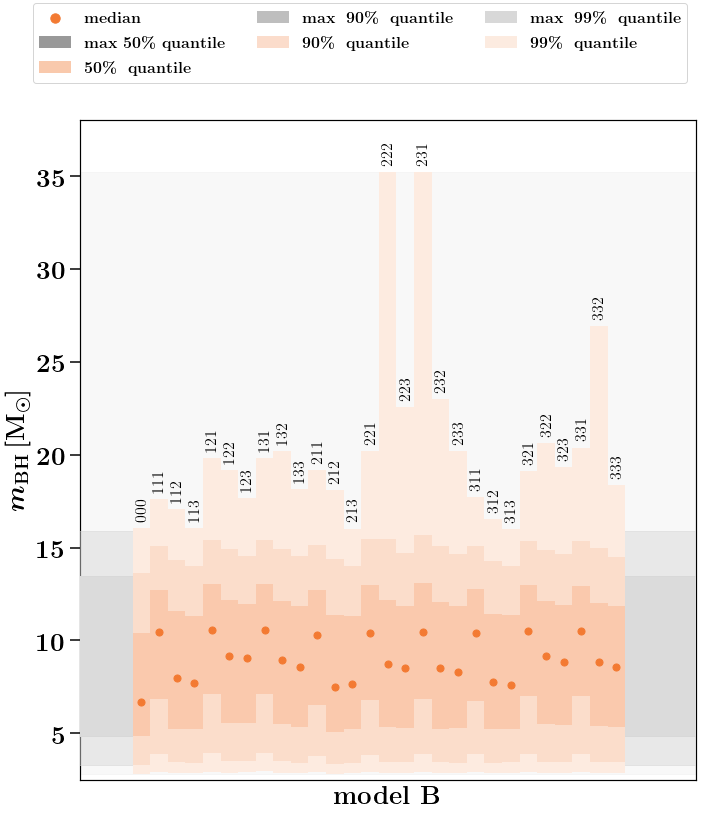

In [12]:
# ['Mass1', 'Mass2', 'tc',\
#                    'log10(tc)', 'TotMass', 'ChirpMass', 'q', Zi]
solar=0.0142
xright = 0.5 # extra space on the right 
NumberBPSmodels=15
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]

DCOtype='BHNS'
ncols, nrows= 1,1
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,10), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


print('starting distribution quantile plot')
print('this might take some time since I need to loop through all model variations and plot colorranges - apologies')

xlabel = r'\textbf{model B}'

ylabel = r'$m_{\rm{BH}}  \, [\rm{M}_{\odot}]$'
xvarind = 0 # number of xvar in list above 
plotConfidenceIntervalsZOOM(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe,  ylim=[2.5,38], xlabel=xlabel, ylabel=ylabel)


BPScolors       = sns.color_palette("husl", len(BPSnameslist))
for ind_q, interval in enumerate([ '50percent', '90percent', '99percent', 'median']):

    xx_ = [-300, -200]
    yy_ = [-300, -200]

    if interval=='median':
#         if (ind_m==0) & (ind_mssfr==0):
#         axe.scatter(xx_, yy_, \
#                 c='k', s=120, label='fiducial median', \
#                 marker='*', zorder=300, edgecolor='black')                        

        axe.scatter(xx_, yy_, \
                    c=BPScolors[1], s=350, label=r'\textbf{median}', \
                    marker='.', zorder=20)        
    else:


        if interval=='50percent':
            zorder = 110
            yy = yy_
            alpha = 0.4  
            label2=r'$50\%$ \textbf{ quantile}'
            label   = r'\textbf{max }'   r'$50\%$'  + r'\textbf{ quantile}'
        elif interval=='90percent':
            zorder = 105
            yy = yy_
            alpha = 0.25    
            label2=r'$90\%$ \textbf{ quantile}'
            label = r'\textbf{max } $90\%$ \textbf{ quantile}'
        elif interval =='99percent':
            zorder = 102
            yy = yy_
            alpha = 0.15
            label2=r'$99\%$ \textbf{ quantile}'
            label = r'\textbf{max } $99\%$ \textbf{ quantile}'

#         axe.bar(xx_, height=(yy[1]-yy[0]), bottom=yy[0], color='white', alpha=1, \
#                width=dxlen, zorder=zorder-1)
        axe.bar(xx_, height=(yy[1]-yy[0]), bottom=yy[0], color='k', alpha=alpha, \
               width=0.5, zorder=zorder, label=label)
        axe.bar(xx_, height=(yy[1]-yy[0]), bottom=yy[0], color=BPScolors[1], alpha=alpha, \
               width=0.5, zorder=zorder, label=label2)


handles, labels = axe.get_legend_handles_labels()
    
axe.set_xlim(+0.5, 1+xright)
    
# axe.set_xlim(-0.5, 15+xright)
lgd = f.legend(handles, labels, fontsize=fs-8, ncol=3,\
                bbox_to_anchor=(.5, 1.14) , loc='upper center') #,  markerscale=2., scatterpoints=1) # loc = 'upper center') #0.56 works 


plt.tight_layout()

f.subplots_adjust(wspace=0, hspace=0.0)

f.savefig('./DistributionQuantileFigures/CDF_BPSandMSSFRvariations_Summary_BHNS_ZOOM.png', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')#, bbox_inches='tight')#, loc='upper center') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
f.savefig('./DistributionQuantileFigures/CDF_BPSandMSSFRvariations_Summary_BHNS_ZOOM.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')#, bbox_inches='tight')#, loc='upper center')#, bbox_inches='tight', loc='upper center') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()

# BHBH 

starting distribution quantile plot
this might take some time since I need to loop through all model variations and plot colorranges - apologies
('fontsize', 24)
('fontsize', 24)
('fontsize', 24)
halfway
('fontsize', 24)
('fontsize', 24)
('fontsize', 24)
('fontsize', 24)


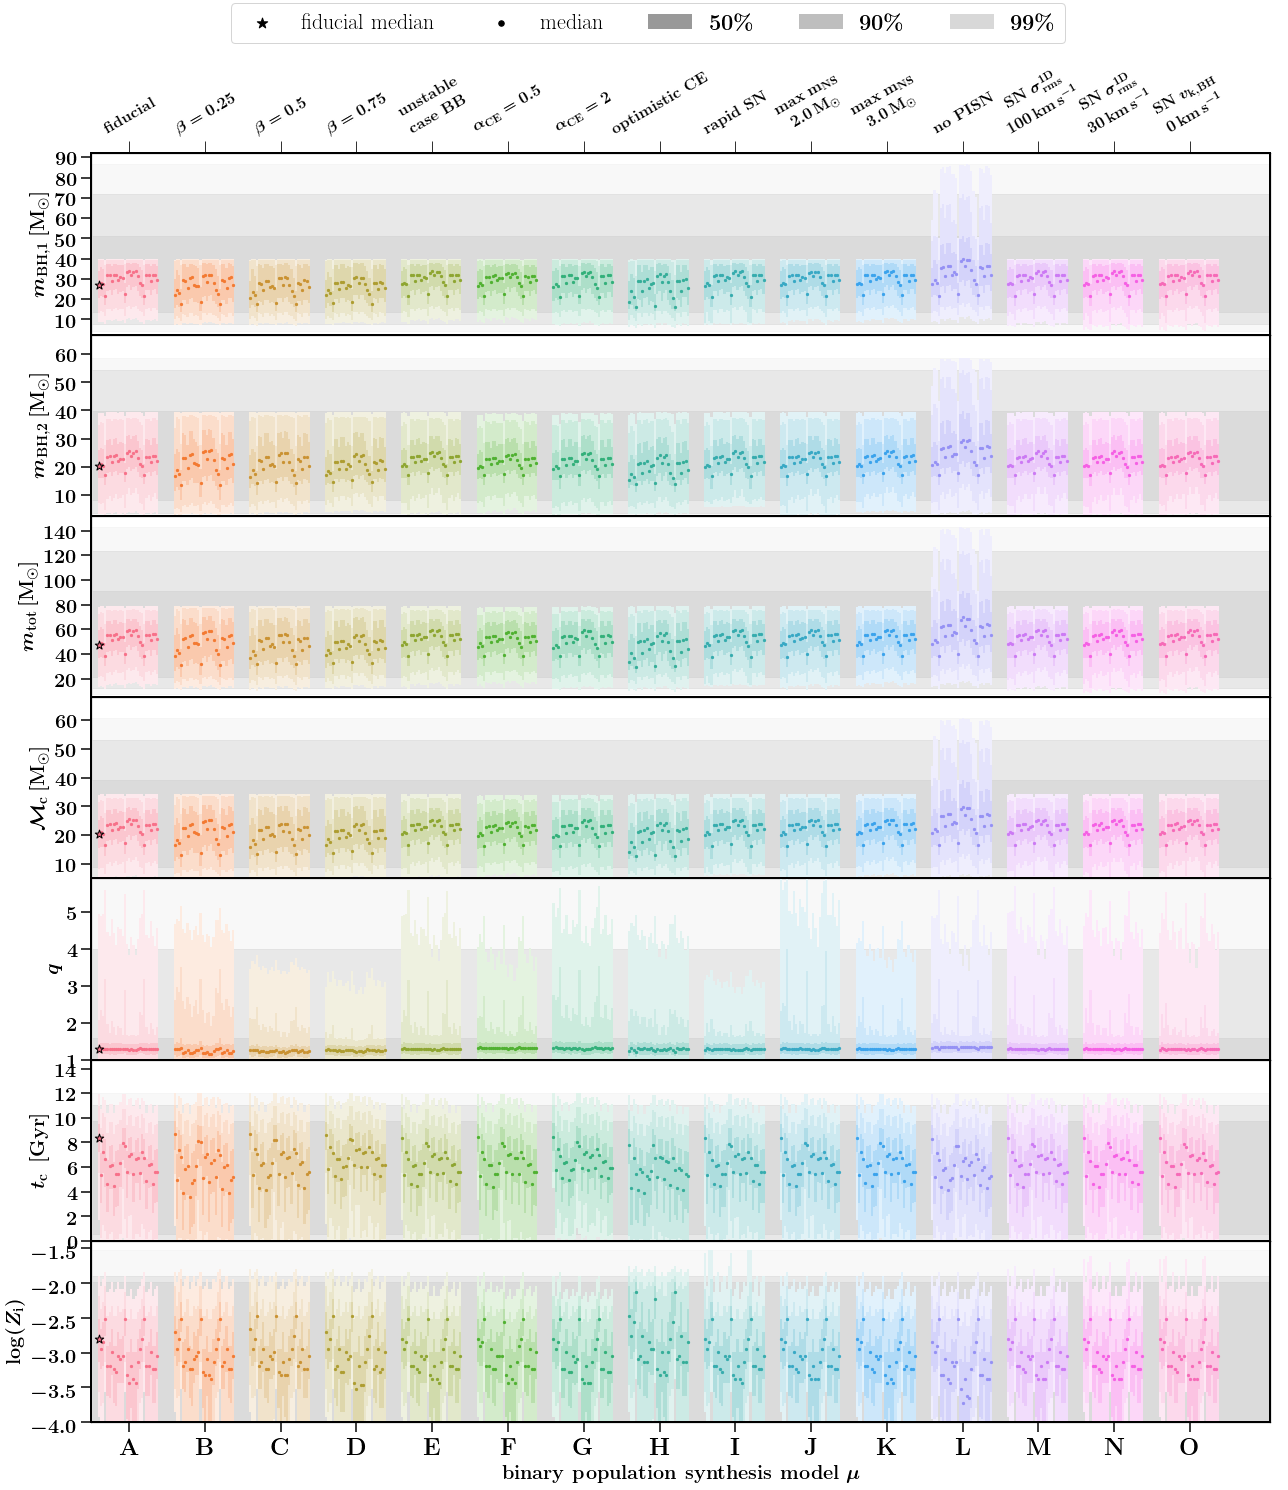

In [25]:
# ['Mass1', 'Mass2', 'tc',\
#                    'log10(tc)', 'TotMass', 'ChirpMass', 'q', Zi]
solar=0.0142
xright = 0.05 # extra space on the right 
NumberBPSmodels=15
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]

DCOtype='BHBH'
ncols, nrows= 1,7
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


print('starting distribution quantile plot')
print('this might take some time since I need to loop through all model variations and plot colorranges - apologies')

xlabel = r'\textbf{binary population synthesis model} $\mu$'

ylabel = r'$m_{\rm{BH,1}}  \, [\rm{M}_{\odot}]$'
xvarind = 0 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[0],  ylim=[2.5,92], xlabel=xlabel, ylabel=ylabel)

ylabel = r'$m_{\rm{BH,2}}   \, [\rm{M}_{\odot}]$'
xvarind = 1 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[1],  ylim=[2.5,67], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$m_{\rm{tot}}  \, [\rm{M}_{\odot}]$'
xvarind = 4 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[2],  ylim=[5,152], xlabel=xlabel, ylabel=ylabel)
print('halfway')
ylabel = r'$\mathcal{M}_{\rm{c}}  \, [\rm{M}_{\odot}]$'
xvarind = 5 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[3],  ylim=[5,68], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$q$'
xvarind = 6 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[4],  ylim=[1,5.9], xlabel=xlabel, ylabel=ylabel)





ylabel = r' $t_{\rm{c}}$ $ \, [{\rm{Gyr}}]$'
xvarind = 2
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[5],  ylim=[0,14.72], xlabel=xlabel, ylabel=ylabel)    





ylabel = r'$\log(Z _{\rm{i}})$'
xvarind = 8 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[6],  ylim=[-4,np.log10(0.04)], xlabel=xlabel, ylabel=ylabel)



for ind_q, interval in enumerate([ 'median', '50percent', '90percent', '99percent']):

    xx_ = [-300, -200]
    yy_ = [-300, -200]

    if interval=='median':
#         if (ind_m==0) & (ind_mssfr==0):
        axe[0].scatter(xx_, yy_, \
                c='k', s=120, label='fiducial median', \
                marker='*', zorder=300, edgecolor='black')                        

        axe[0].scatter(xx_, yy_, \
                    c='k', s=120, label='median', \
                    marker='.', zorder=200)        
    else:


        if interval=='50percent':
            zorder = 110
            yy = yy_
            alpha = 0.4  
            label=r'$50\%$'
        elif interval=='90percent':
            zorder = 105
            yy = yy_
            alpha = 0.25    
            label =r'$90\%$'
        elif interval =='99percent':
            zorder = 102
            yy = yy_
            alpha = 0.15
            label=r'$99\%$'

#         axe.bar(xx_, height=(yy[1]-yy[0]), bottom=yy[0], color='white', alpha=1, \
#                width=dxlen, zorder=zorder-1)
        axe[0].bar(xx_, height=(yy[1]-yy[0]), bottom=yy[0], color='k', alpha=alpha, \
               width=0.5, zorder=zorder, label=label)


handles, labels = axe[0].get_legend_handles_labels()
    
axe[0].set_xlim(-0.5, 15+xright)
lgd = f.legend(handles, labels, fontsize=fs-2, ncol=9,\
                bbox_to_anchor=(.5, 1.04) , loc='upper center') #,  markerscale=2., scatterpoints=1) # loc = 'upper center') #0.56 works 


plt.tight_layout()

f.subplots_adjust(wspace=0, hspace=0.0)

f.savefig('./DistributionQuantileFigures/CDF_BPSandMSSFRvariations_Summary_'+DCOtype+'_Z.png', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')#, bbox_inches='tight')#, loc='upper center') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
f.savefig('./DistributionQuantileFigures/CDF_BPSandMSSFRvariations_Summary_'+DCOtype+'_Z.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')#, bbox_inches='tight')#, loc='upper center')#, bbox_inches='tight', loc='upper center') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()

# NSNS 

starting distribution quantile plot
this might take some time since I need to loop through all model variations and plot colorranges - apologies
('fontsize', 24)
('fontsize', 24)
('fontsize', 24)
halfway
('fontsize', 24)
('fontsize', 24)
('fontsize', 24)
('fontsize', 24)


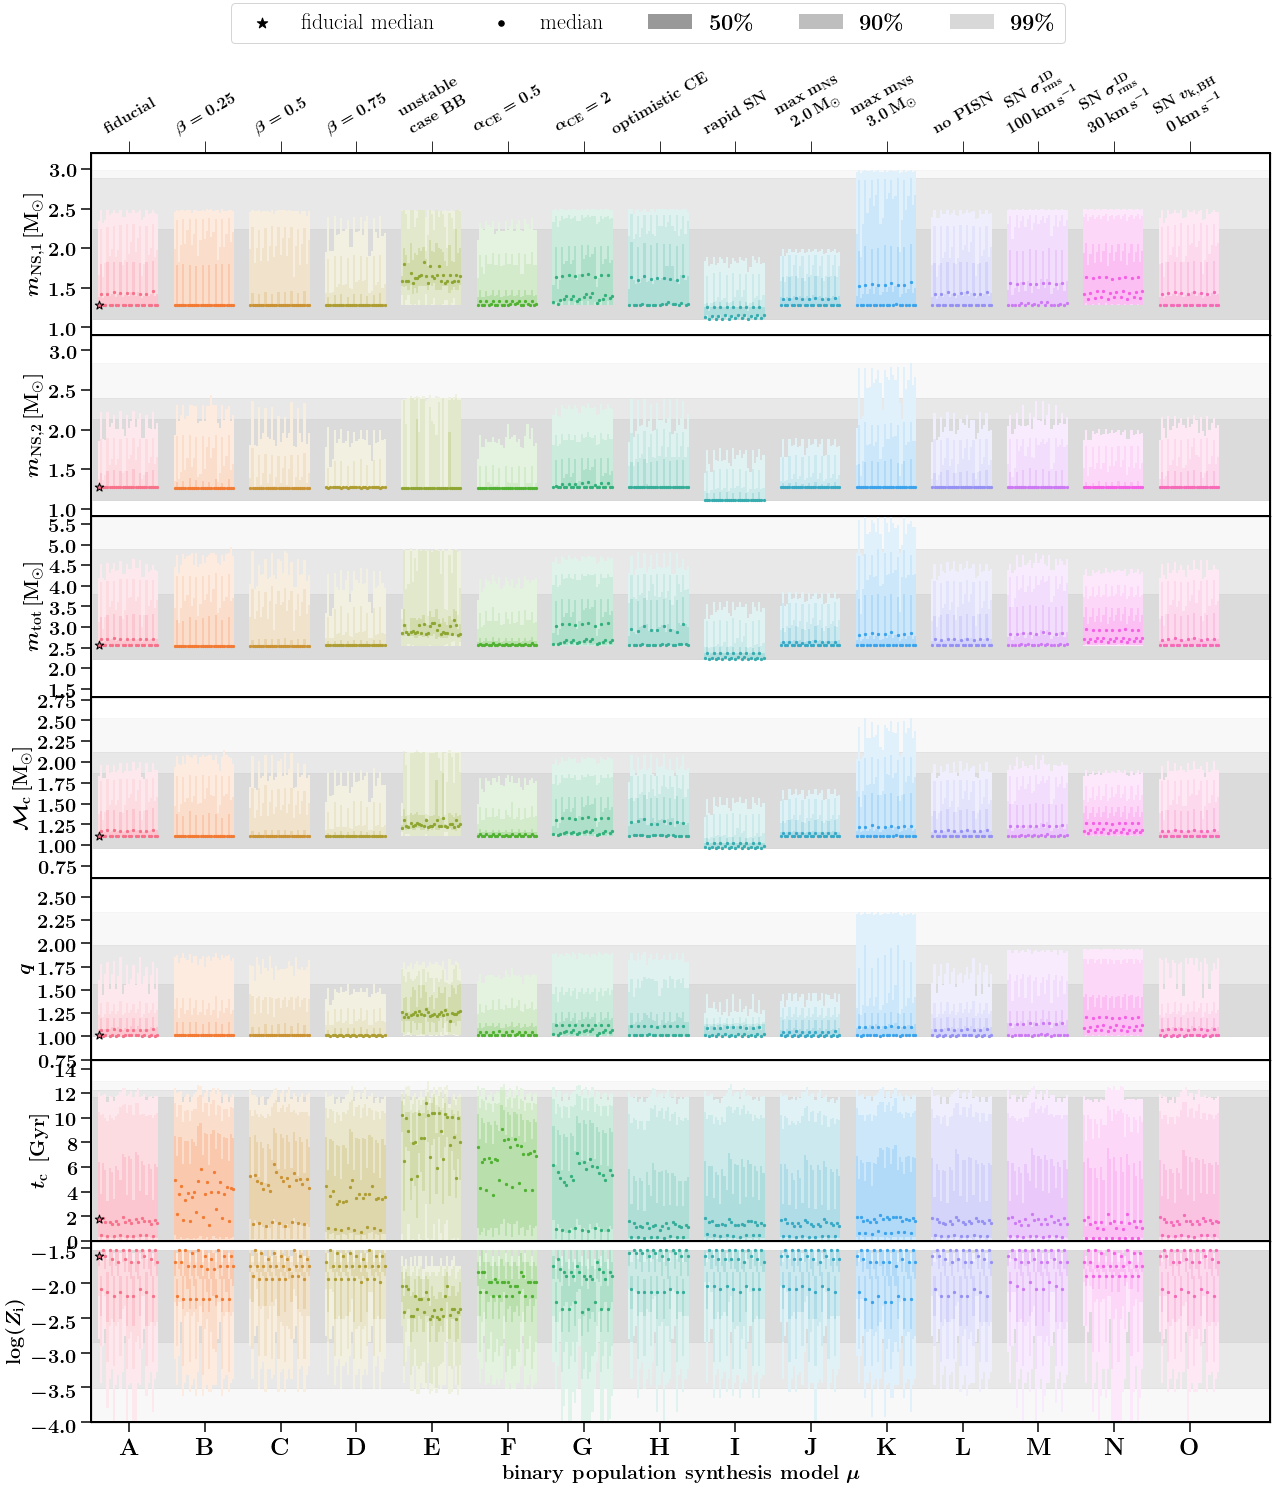

In [26]:
# ['Mass1', 'Mass2', 'tc',\
#                    'log10(tc)', 'TotMass', 'ChirpMass', 'q', Zi]
solar=0.0142
xright = 0.05 # extra space on the right 
NumberBPSmodels=15
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]

DCOtype='NSNS'
ncols, nrows= 1,7
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


print('starting distribution quantile plot')
print('this might take some time since I need to loop through all model variations and plot colorranges - apologies')

xlabel = r'\textbf{binary population synthesis model} $\mu$'

ylabel = r'$m_{\rm{NS,1}}  \, [\rm{M}_{\odot}]$'
xvarind = 0 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[0],  ylim=[0.91,3.2], xlabel=xlabel, ylabel=ylabel)

ylabel = r'$m_{\rm{NS,2}}   \, [\rm{M}_{\odot}]$'
xvarind = 1 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[1],  ylim=[0.91,3.2], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$m_{\rm{tot}}  \, [\rm{M}_{\odot}]$'
xvarind = 4 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[2],  ylim=[1.3, 5.7], xlabel=xlabel, ylabel=ylabel)
print('halfway')
ylabel = r'$\mathcal{M}_{\rm{c}}  \, [\rm{M}_{\odot}]$'
xvarind = 5 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[3],  ylim=[0.6,2.78], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$q$'
xvarind = 6 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[4],  ylim=[0.75,2.7], xlabel=xlabel, ylabel=ylabel)





ylabel = r' $t_{\rm{c}}$ $ \, [{\rm{Gyr}}]$'
xvarind = 2
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[5],  ylim=[0,14.72], xlabel=xlabel, ylabel=ylabel)    





ylabel = r'$\log(Z _{\rm{i}})$'
xvarind = 8 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[6],  ylim=[-4,np.log10(0.04)], xlabel=xlabel, ylabel=ylabel)



for ind_q, interval in enumerate([ 'median', '50percent', '90percent', '99percent']):

    xx_ = [-300, -200]
    yy_ = [-300, -200]

    if interval=='median':
#         if (ind_m==0) & (ind_mssfr==0):
        axe[0].scatter(xx_, yy_, \
                c='k', s=120, label='fiducial median', \
                marker='*', zorder=300, edgecolor='black')                        

        axe[0].scatter(xx_, yy_, \
                    c='k', s=120, label='median', \
                    marker='.', zorder=200)        
    else:


        if interval=='50percent':
            zorder = 110
            yy = yy_
            alpha = 0.4  
            label=r'$50\%$'
        elif interval=='90percent':
            zorder = 105
            yy = yy_
            alpha = 0.25    
            label =r'$90\%$'
        elif interval =='99percent':
            zorder = 102
            yy = yy_
            alpha = 0.15
            label=r'$99\%$'

#         axe.bar(xx_, height=(yy[1]-yy[0]), bottom=yy[0], color='white', alpha=1, \
#                width=dxlen, zorder=zorder-1)
        axe[0].bar(xx_, height=(yy[1]-yy[0]), bottom=yy[0], color='k', alpha=alpha, \
               width=0.5, zorder=zorder, label=label)


handles, labels = axe[0].get_legend_handles_labels()
    
axe[0].set_xlim(-0.5, 15+xright)
lgd = f.legend(handles, labels, fontsize=fs-2, ncol=9,\
                bbox_to_anchor=(.5, 1.04) , loc='upper center') #,  markerscale=2., scatterpoints=1) # loc = 'upper center') #0.56 works 


plt.tight_layout()

f.subplots_adjust(wspace=0, hspace=0.0)

f.savefig('./DistributionQuantileFigures/CDF_BPSandMSSFRvariations_Summary_'+DCOtype+'_Z.png', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')#, bbox_inches='tight')#, loc='upper center') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
f.savefig('./DistributionQuantileFigures/CDF_BPSandMSSFRvariations_Summary_'+DCOtype+'_Z.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')#, bbox_inches='tight')#, loc='upper center')#, bbox_inches='tight', loc='upper center') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()